# Predicting Economies Using World Bank Datasets

Sean McSkeane, Albert Chu, Sonny Liu

## Introduction

Write brief introduction here. Should define some of the terms we will be using GDP.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm

## Data Collection

For the purposes of this project, we used data from the World Bank dataset. The World Bank site allowed for us to build a custom dataset by choosing the variables that we wanted. We chose to include variables that we thought could be used a predictors of GDP. We purposely chose more variables than we planned on using as we were unsure of the quality of the data, and which variables were missing values.

In [2]:
worldBankDevInc = pd.read_csv("WorldBankData/data.csv")
worldBankDevInc.dropna(inplace=True)
countryName = ""
first = True
newRows = []
countriesData = []

for index, row in worldBankDevInc.iterrows():
    if (countryName != row["Country Name"]):
        if (first == False):
            #CHOSE WHAT YEARS TO DROP HERE
            df = df.drop(df.loc[:, '1960 [YR1960]':'1990 [YR1990]'].columns, axis = 1)  
            countriesData.append(df)
            # IF YOU WANT TO SEE ALL COUNTRIES DATA UNCOMMENT THIS
#             with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#                 display(df)
        countryName = row["Country Name"]
        df = pd.DataFrame(columns=worldBankDevInc.columns) 
        first = False
        
    df = df.append(row, ignore_index=True)

df  = df.drop(df.loc[:, '1960 [YR1960]':'1990 [YR1990]'].columns, axis = 1) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    display(countriesData[206])

Country Name Country Code  \
0         World          WLD   
1         World          WLD   
2         World          WLD   
3         World          WLD   
4         World          WLD   
5         World          WLD   
6         World          WLD   
7         World          WLD   
8         World          WLD   
9         World          WLD   
10        World          WLD   
11        World          WLD   
12        World          WLD   
13        World          WLD   
14        World          WLD   
15        World          WLD   
16        World          WLD   
17        World          WLD   
18        World          WLD   
19        World          WLD   
20        World          WLD   
21        World          WLD   
22        World          WLD   
23        World          WLD   
24        World          WLD   
25        World          WLD   
26        World          WLD   
27        World          WLD   
28        World          WLD   
29        World          WLD   

                                          Series Name        Series Code  \
0   Adjusted net enrollment rate, primary (% of pr...        SE.PRM.TENR   
1      Adjusted net national income (annual % growth)  NY.ADJ.NNTY.KD.ZG   
2          Adjusted net national income (current US$)     NY.ADJ.NNTY.CD   
3               Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   
4   Employment in agriculture (% of total employme...     SL.AGR.EMPL.ZS   
5   Employment in industry (% of total employment)...     SL.IND.EMPL.ZS   
6   Employment in services (% of total employment)...     SL.SRV.EMPL.ZS   
7            Fertility rate, total (births per woman)     SP.DYN.TFRT.IN   
8                                   GDP (current US$)     NY.GDP.MKTP.CD   
9                               GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
10                   GDP per capita growth (annual %)  NY.GDP.PCAP.KD.ZG   
11                       GDP per capita (current US$)     NY.GDP.PCAP.CD   
12  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
13                                  GNI (current US$)     NY.GNP.MKTP.CD   
14                              GNI growth (annual %)  NY.GNP.MKTP.KD.ZG   
15                   GINI index (World Bank estimate)        SI.POV.GINI   
16                 Inflation, GDP deflator (annual %)  NY.GDP.DEFL.KD.ZG   
17              Inflation, consumer prices (annual %)     FP.CPI.TOTL.ZG   
18  Labor force participation rate, total (% of to...  SL.TLF.CACT.NE.ZS   
19            Life expectancy at birth, total (years)     SP.DYN.LE00.IN   
20  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.NE.ZS   
21                       Population growth (annual %)        SP.POP.GROW   
22                                  Population, total        SP.POP.TOTL   
23                             Real interest rate (%)        FR.INR.RINR   
24   Prevalence of undernourishment (% of population)     SN.ITK.DEFC.ZS   
25                          Lending interest rate (%)        FR.INR.LEND   
26           Imports of goods and services (% of GDP)     NE.IMP.GNFS.ZS   
27    Imports of goods and services (annual % growth)  NE.IMP.GNFS.KD.ZG   
28           Exports of goods and services (% of GDP)     NE.EXP.GNFS.ZS   
29    Exports of goods and services (annual % growth)  NE.EXP.GNFS.KD.ZG   

         1991 [YR1991]      1992 [YR1992]        1993 [YR1993]  \
0                   ..                 ..                   ..   
1     1.46301808779616    2.4680809839501     1.71835487641421   
2                   ..                 ..                   ..   
3                   ..                 ..                   ..   
4     43.8002650137584   43.6365914248492     42.8938027932221   
5     21.6516925324977    21.527138324844     21.6117847103248   
6     34.5481369437425   34.8363221476465     35.4942497012682   
7     3.15728608428153   3.07150626304713     2.98762638660655   
8     23942384829866.4   25425855198396.5     2583819803403

Country Name Country Code  \
0   United States          USA   
1   United States          USA   
2   United States          USA   
3   United States          USA   
4   United States          USA   
5   United States          USA   
6   United States          USA   
7   United States          USA   
8   United States          USA   
9   United States          USA   
10  United States          USA   
11  United States          USA   
12  United States          USA   
13  United States          USA   
14  United States          USA   
15  United States          USA   
16  United States          USA   
17  United States          USA   
18  United States          USA   
19  United States          USA   
20  United States          USA   
21  United States          USA   
22  United States          USA   
23  United States          USA   
24  United States          USA   
25  United States          USA   
26  United States          USA   
27  United States          USA   
28  United States          USA   
29  United States          USA   

                                          Series Name        Series Code  \
0   Adjusted net enrollment rate, primary (% of pr...        SE.PRM.TENR   
1      Adjusted net national income (annual % growth)  NY.ADJ.NNTY.KD.ZG   
2          Adjusted net national income (current US$)     NY.ADJ.NNTY.CD   
3               Current health expenditure (% of GDP)  SH.XPD.CHEX.GD.ZS   
4   Employment in agriculture (% of total employme...     SL.AGR.EMPL.ZS   
5   Employment in industry (% of total employment)...     SL.IND.EMPL.ZS   
6   Employment in services (% of total employment)...     SL.SRV.EMPL.ZS   
7            Fertility rate, total (births per woman)     SP.DYN.TFRT.IN   
8                                   GDP (current US$)     NY.GDP.MKTP.CD   
9                               GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
10                   GDP per capita growth (annual %)  NY.GDP.PCAP.KD.ZG   
11                       GDP per capita (current US$)     NY.GDP.PCAP.CD   
12  Government expenditure on education, total (% ...  SE.XPD.TOTL.GD.ZS   
13                                  GNI (current US$)     NY.GNP.MKTP.CD   
14                              GNI growth (annual %)  NY.GNP.MKTP.KD.ZG   
15                   GINI index (World Bank estimate)        SI.POV.GINI   
16                 Inflation, GDP deflator (annual %)  NY.GDP.DEFL.KD.ZG   
17              Inflation, consumer prices (annual %)     FP.CPI.TOTL.ZG   
18  Labor force participation rate, total (% of to...  SL.TLF.CACT.NE.ZS   
19            Life expectancy at birth, total (years)     SP.DYN.LE00.IN   
20  Unemployment, total (% of total labor force) (...  SL.UEM.TOTL.NE.ZS   
21                       Population growth (annual %)        SP.POP.GROW   
22                                  Population, total        SP.POP.TOTL   
23                             Real interest rate (%)        FR.INR.RINR   
24   Prevalence of undernourishment (% of population)     SN.ITK.DEFC.ZS   
25                          Lending interest rate (%)        FR.INR.LEND   
26           Imports of goods and services (% of GDP)     NE.IMP.GNFS.ZS   
27    Imports of goods and services (annual % growth)  NE.IMP.GNFS.KD.ZG   
28           Exports of goods and services (% of GDP)     NE.EXP.GNFS.ZS   
29    Exports of goods and services (annual % growth)  NE.EXP.GNFS.KD.ZG   

         1991 [YR1991]     1992 [YR1992]     1993 [YR1993]     1994 [YR1994]  \
0     98.8573913574219                ..  96.9185333251953  96.2886962890625   
1    0.449947887381057  3.48067522642867  2.32026276379192  4.54252119324556   
2     5148953031205.18  5455783087975.63  5712110818966.12  6105794399121.82   
3                   ..                ..                ..                ..   
4     2.77699995040894  2.74000000953674  2.58999991416931  2.76999998092651   
5     25.4820003509521   25.257999420166  25.1860008239746  25.1340007781982   
6     71.7409973144531  72.000999

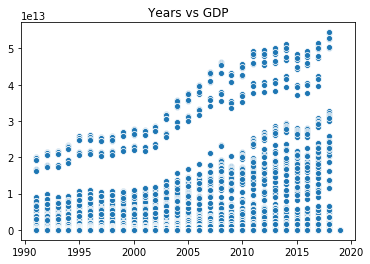

In [3]:
worldData = pd.concat(countriesData)
years = []
GDP = []
counter = 0
year = 1991

for column in worldData:
    if column == str(year) + " [YR" + str(year) + "]":
        GDP += worldData[column].tolist()
        for x in range(7890):
            years.append(year)
        year += 1

for x in range(len(GDP)):
    if GDP[x] == "..":
        GDP[x] = 0

# for x in range(1000):
#     print(GDP[x])
    
# print(len(GDP))
# print(len(years))

scatterPlot = sns.scatterplot(x=years, y=GDP).set_title('Years vs GDP')

In [4]:
worldBankDevInc.describe()

Country Name Country Code                               Series Name  \
count          7920         7920                                      7920   
unique          264          264                                        30   
top      Low income          LIC  Fertility rate, total (births per woman)   
freq             30           30                                       264   

           Series Code 1960 [YR1960] 1961 [YR1961] 1962 [YR1962]  \
count             7920          7920          7920          7920   
unique              30          1627          2173          2184   
top     SL.IND.EMPL.ZS            ..            ..            ..   
freq               264          6241          5682          5671   

       1963 [YR1963] 1964 [YR1964] 1965 [YR1965]  ... 2010 [YR2010]  \
count           7920          7920          7920  ...          7920   
unique          2187          2199          2247  ...          6065   
top               ..            ..            ..  ...            ..   
freq            5667          5660          5608  ...          1620   

       2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014] 2015 [YR2015]  \
count           7920          7920          7920          7920          7920   
unique          6071          6083          6092          6089          6031   
top               ..            ..            ..            ..            ..   
freq            1627          1601          1606          1613          1680   

       2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  
count           7920          7920          7920          7920  
unique          5976          5576          3903           690  
top               ..            ..            ..            ..  
freq            1745          2126          3932          7220  

[4 rows x 64 columns]

## Data Processing

## Exploratory Analysis and Data Visualization

## Analysis, Hypothesis Testing, and Machine Learning

## Insight and Policy Decision